![AltText](http://www.scdn.co/i/_global/open-graph-default.png "Spotify Logo")


# Introduction and Motivations


## Proposal

To introduce the subject material and understand the motivations behind this study, we first recall our original project proposal:
>As people who are like music and have received some form of musical training, we decided to do our data science topic on songs.  A look at the Spotify data obtained in Kaggle has shown lists of top ranking songs, some song classifications, and some attributes that are known as "audio analyses."  Metrics such as "danceability" and "energy" are given quantitative values and are available through Spotify's API.  We intend to use this data as a data lake for our experiments in order to find out what Spotify looks for in a hit.  

>We'd like to answer questions such as "Given today's trends, what does it take to make it to Spotify's top 50 songs?"  and "What's more important for streaming numbers today, instrumentalness or danceability?"  We add the qualifier for the present because at the moment we do not have access to such ranking data from 2016 or earlier.

## Defining the Question




As outlined in the proposal, we'd like to find out what makes up a Spotify hit.  Which of the audio features are the most important?  What gets more listens - vocals-based music like rap or instrumentals like EDM?  The potential significance of such questions are at least two-fold: 

1. Develop some sort of model that could determine if a song's characteristics are enough to be a Spotify chart-topper
2. If enough data can be collected, perhaps even correlate song popularity with production techniques. For example Max Martin is a producer who's considered to have a "magic touch" - he has produced or co-written 22 Billboard Hot 100 **CHART TOPPERS**.  It would be interesting to find out what are his secrets to success.

More info on Max Martin from infowetrust.com: 

![AltText](https://i1.wp.com/infowetrust.com/wp-content/uploads/2015/11/Who-is-Max-Martin-03.png?w=2100 "Who is Max Martin?")  ![AltText](https://www.independent.ie/opinion/article31413539.ece/ALTERNATES/h342/2015-08-01_opi_11500704_I2.JPG "What's he hiding?")



# Methods and Tools

## Getting the Data

![AltText](https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/media/kaggle-transparent.svg "Kaggle Logo")

For the unfamiliar, Spotify is a digital music, podcast, and video streaming service that provides access to more than 30 million songs.  Spotify's Charts rank songs by the number of streams - we obtained the top 100 songs of 2017 to conduct our analysis.  The dataset is available here: https://www.kaggle.com/nadintamer/top-tracks-of-2017/downloads/featuresdf.csv/1 





## Analysis and Visualization
We will use the IPython environment to conduct our analysis.  Our results will be reported here, in this Jupyter Notebook.  We will use the Pandas, Seaborn, and matplotlib libraries to assist with our analysis as well.

First, we set up our notebook:


In [124]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter




The dataset contains other information beyond the name of the songs and its ranking, as shown below.  We also check that the dataset is complete.  In this case, all the fields are valid, and nothing seems to be duplicated.

In [125]:
sdata = pd.read_csv('./featuresdf.csv')
sdata.head(4)


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0


In [126]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [127]:
#check for duplicates
len(sdata[sdata.duplicated() == True])


0

## The Data Fields
The first 3 fields are arranged as follows:
+ **id**: 
    + Spotify URI
+ **name**: 
    + title
+ **artists**: 
    + contributing artists


The following fields are song attributes or audio features that are provided by Spotify via the Spotify API (descriptions taken from https://beta.developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/):
+ **danceability**: 
    + describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 
    + value of 0.0 is least danceable and 1.0 is most danceable.
+ **energy**: 
    + measure from 0.0 to 1.0 which represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
    + perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
+ **key**: 
   + the key the track is in. 
   + integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
+ **loudness**:  
   + overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
   + values typical range between -60 and 0 db.
+ **mode**: 
    + indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 
    + major is represented by 1 and minor is 0.
+ **speechiness**:  
    + detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
    + values above 0.66 describe tracks that are probably made entirely of spoken words. 
    + values between 0.33 and 0.66 describe tracks that may contain both music and speech. 
    + values below 0.33 most likely represent music and other non-speech-like tracks.
+ **acousticness**: 
    + confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
    + 1.0 represents high confidence the track is acoustic.
+ **instrumentalness**: 
    + predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. 
    + values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
+ **liveness**: 
    + detects the presence of an audience in the recording. 
    + value above 0.8 provides strong likelihood that the track is live.
+ **valence**: 
    + measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
+ **tempo**:  
    + overall estimated tempo of a track in beats per minute (BPM). 
    + derives directly from the average beat duration.
+ **duration_ms**: 
    + duration of the track in milliseconds.
+ **time_signature**: 
    + estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

# Preliminary Analysis

To get a general feel of what the data distribution is for our dataset, we first plot each column as a histogram. 

## Histograms

To construct the histograms, we first divide the range of values into "bins," or intervals.  The bin size is determined by default in Seaborn using the Freedman-Diaconis rule: 

$$Bin size = 2\frac{IQR(x)}{\sqrt[3]{n}}$$

where IQR(x) is the interquartile range and n is the number of total observations (which is 100 in this case).



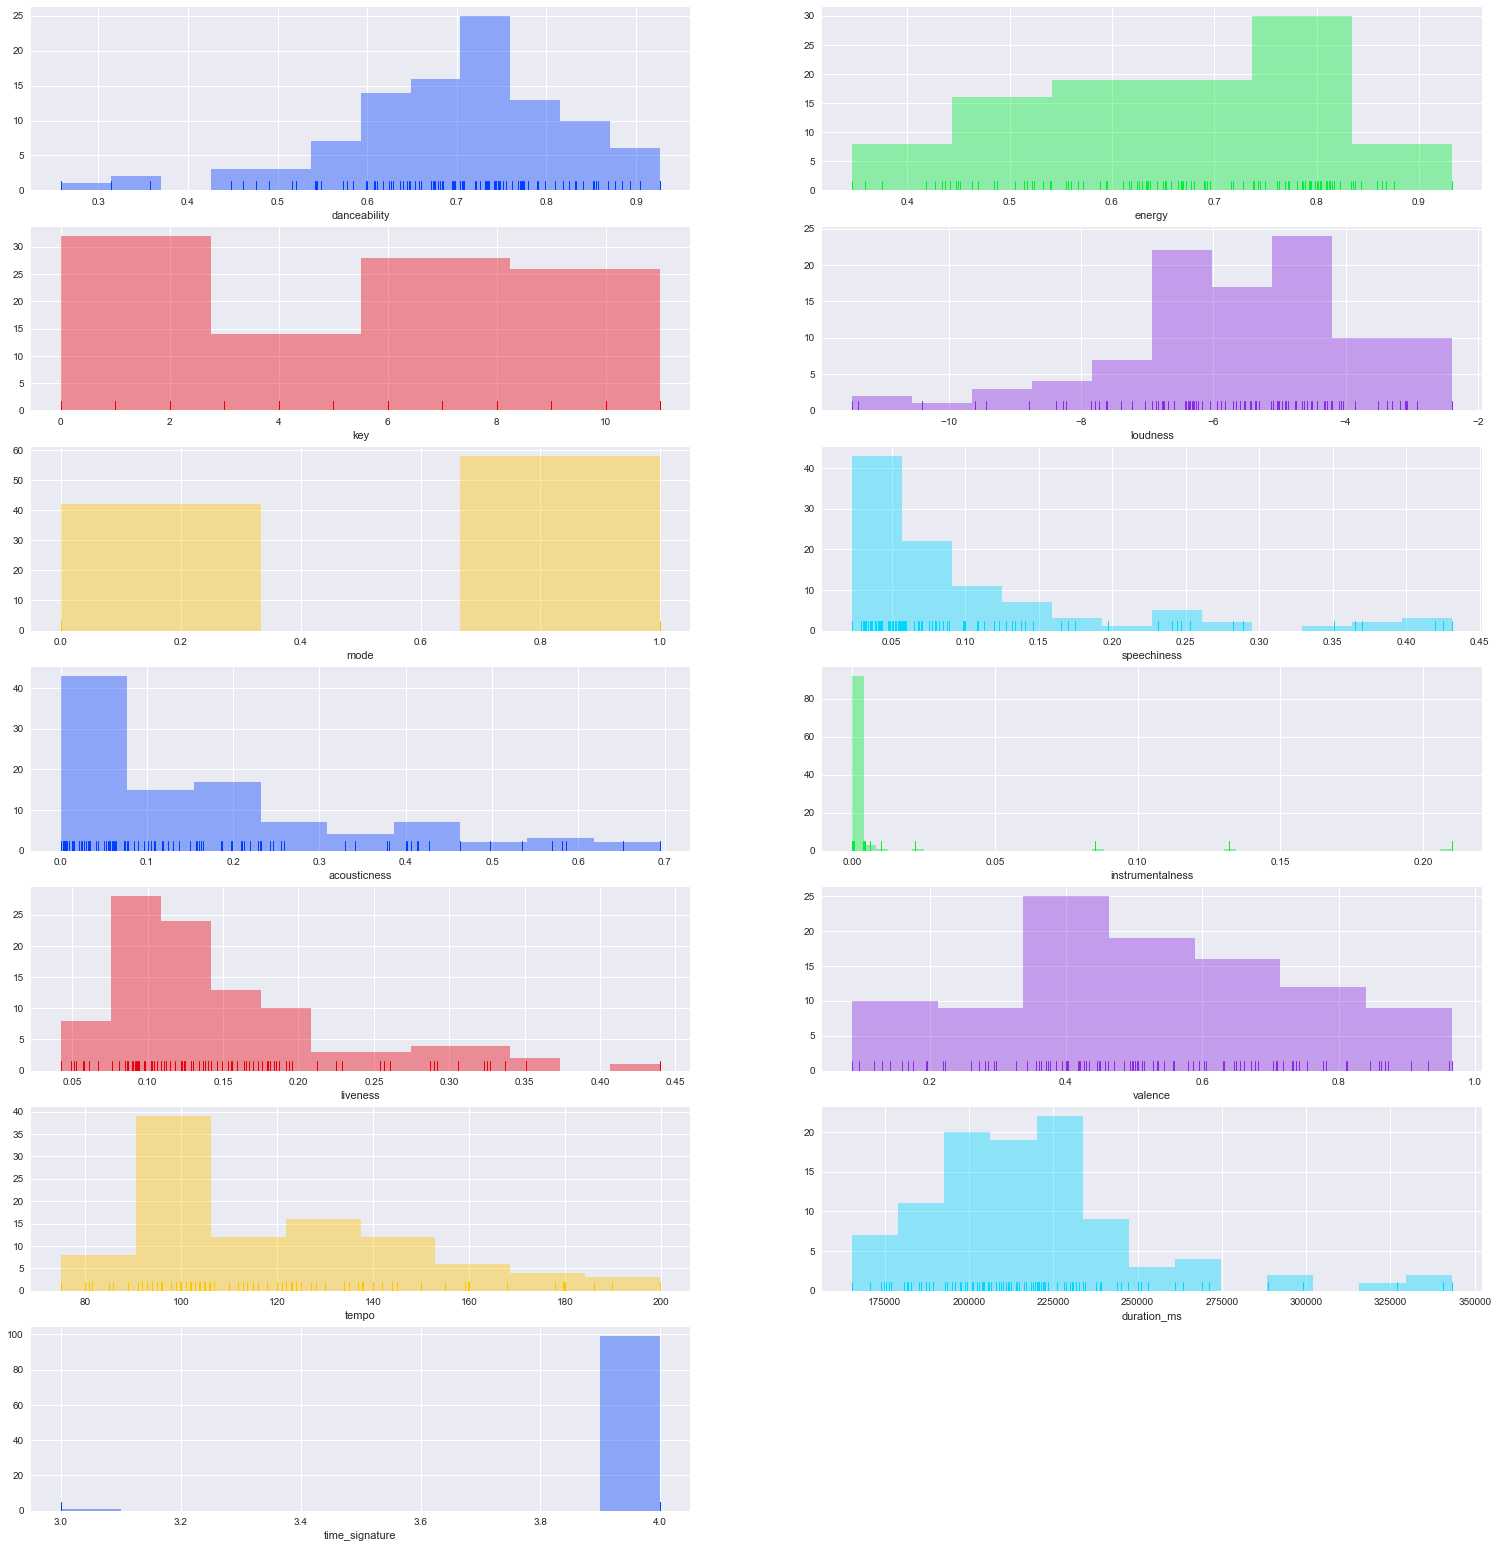

In [128]:
# Distplot each of the song attributes
fig1 = plt.figure(figsize = (26, 56))

pal = sns.color_palette("bright", 13)

for num in range(1, 14):
    plt.subplot(14, 2, num)
    a = sns.distplot(sdata[list(sdata)[num + 2]], color = pal[num -1], rug = True, kde = False)

   



From here, we learn some interesting things about the data at first pass. 
+ All the songs are in 4/4
+ Very few of the songs are instrumental in nature
+ There is a bimodal distribution of sorts for musical mode
+ Acoustincess is inversely correlated with popularity
+ etc

We will continue to give these data a closer look in order to build a model.  From this model we hope to put together some sort of argument that will tell us what combination of attributes creates a song with a lot of streams.

Some ideas that we will apply here:
+ Apply kde fit where appropriate (non-discretized values)
+ From kde derive probabilistic models
+ Deploy an initial neural network trained on this data set to find weights and see if our probabilitistic models work
+ Add more data if possible, rinse and repeat to fine-tune
